# Object Detection with mobilenet  Deep Learning model

## By Nourhene Bahri



# Download 

## mobilenet : http://download.tensorflow.org/models/object_detection
## OpenCV : https://opencv.org/


In [47]:
import os
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure


In [48]:
modelFile = "models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = "models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "coco_class_labels.txt"

# Get the model 

if not os.path.isdir('models'):
    os.mkdir("models")

if not os.path.isfile(modelFile):
    os.chdir("models")
    # Download the tensorflow Model
    urllib.request.urlretrieve('http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz', 'ssd_mobilenet_v2_coco_2018_03_29.tar.gz')

    # Uncompress the file
    !tar -xvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

    # Delete the tar.gz file
    os.remove('ssd_mobilenet_v2_coco_2018_03_29.tar.gz')

    # Come back to the previous directory
    os.chdir("..")

## Check Class Labels 


In [49]:
with open(classFile) as fp:
    labels = fp.read().split("\n") # Class labels
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


## Read Tensorflow Model

In [50]:
# Read the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

## Detect Objects


In [51]:
# For ach file in the directory
def detect_objects(net, im):
    #image dimension
    dim = 300
    
    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0,0,0), swapRB=True, crop=False) # Do not crop image to preserve its features

    # Pass blob to the network
    net.setInput(blob)
    
    # Prediction
    objects = net.forward()
    return objects


In [52]:
# Object's class display 

def display_text(im, text, x, y):
    
    # Get text size 
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
            
    # Use text size to create a green rectangle    
    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,255,0), cv2.FILLED);
    # Display black text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0,0,0), THICKNESS, cv2.LINE_AA)


## Display Objects

In [53]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX 
FONT_SCALE = 0.7
THICKNESS = 1

def display_objects(im, objects, threshold = 0.5): # Define a suitable threshorld (0.5 is the classic one)

    rows = im.shape[0]; cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        # Get the class and confidence 
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        # Get original cordinates 
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Convert Image to RGB 
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    # Display final result
    plt.figure(figsize=(30,10)); plt.imshow(mp_img); plt.show();

## Tests

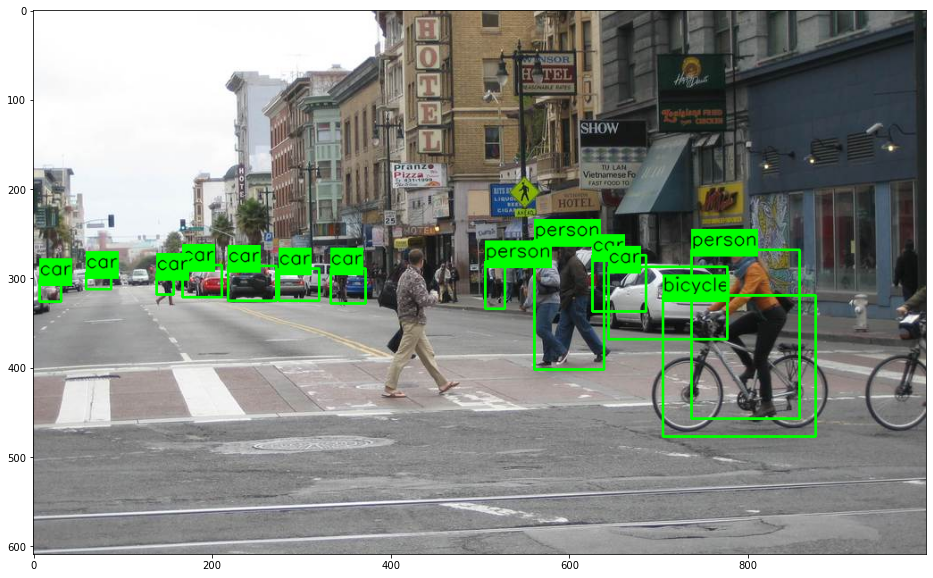

In [54]:
img1 = cv2.imread('images/street.jpg')
objects = detect_objects(net, img1) # get a list of objects detected 
display_objects(img1, objects) # Show the results

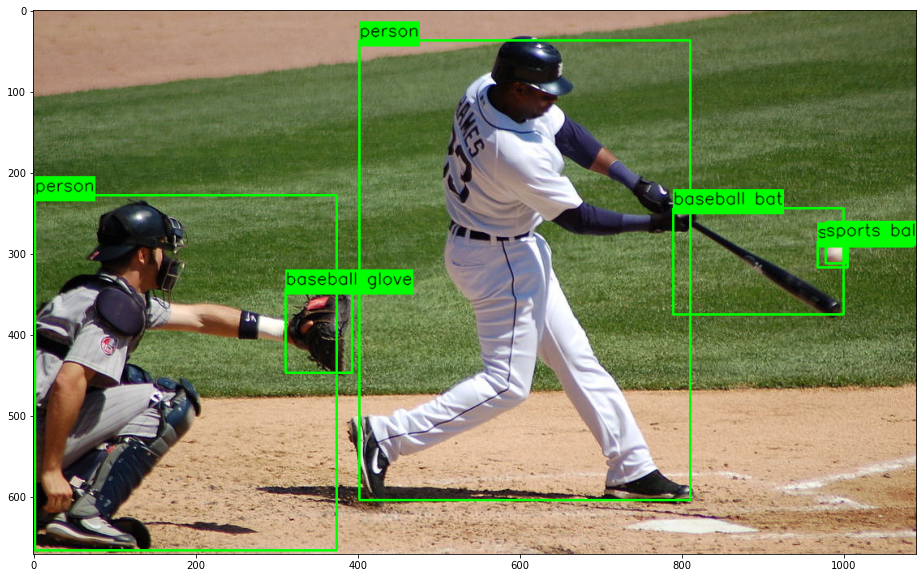

In [55]:
img2 = cv2.imread('images/baseball.jpg')
objects = detect_objects(net, img2)
display_objects(img2, objects, 0.2)

# Optical caractor detection

##  Download easyocr : https://pypi.org/project/easyocr/

In [1]:
import easyocr 

# Get the Reader class which is the base class for EasyOCR 
reader = easyocr.Reader(['en'],gpu=False)

Using CPU. Note: This module is much faster with a GPU.


# #Apply the reader on an image

In [57]:
result = reader.readtext('images/surf.jpeg')


## Draw results

In [58]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

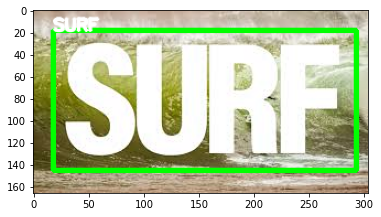

In [59]:
img = cv2.imread('images/surf.jpeg')
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

## Handling Multiple Lines

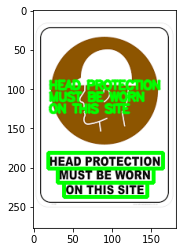

In [60]:
img = cv2.imread('images/sign.png')
result3 = reader.readtext('images/sign.png')

spacer = 100
for detection in result3: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()